In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [15]:
path_data = "../nextbike/data/"

In [18]:
df = pd.read_csv(path_data+"output/Features.csv", index_col="Unnamed: 0")
df.sample(5)

,p_place_type_start,Start Time,Bike Number,p_uid_start,p_bikes_start,Latitude_start,b_bike_type_start,Start Place_id,Longitude_start,p_place_type_end,...,plz_start,plz_end,month,day,hour,p_spot_start,p_bike_start,p_spot_end,p_bike_end,Weekend
159379,0,1964910592,90456,66128,6,49.435605,71,4635.0,11.116642,0,...,90478,90478,10,28,16,1,0,1,0,0
96251,12,-1346723840,90264,23480940,1,49.460867,71,0.0,11.071942,12,...,90419,90403,10,15,17,0,1,0,1,0
130662,12,-1459361792,90361,26340037,1,49.452400,71,0.0,11.076376,12,...,90403,90403,12,26,0,0,1,0,1,0
37739,12,2096967680,90102,22736934,1,49.447022,71,0.0,11.057963,12,...,90443,90429,9,29,10,0,1,0,1,1
8659,12,-549580800,90026,25390506,1,49.459040,71,0.0,11.096041,12,...,90489,90409,11,28,9,0,1,0,1,0


In [22]:
X = df.drop("Duration", axis=1)
y = df["Duration"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
st_scaler = StandardScaler()
st_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
X_train_scaled = st_scaler.transform(X_train)

# NN PART

In [111]:
model = keras.Sequential(
    [layers.Dense(36, activation="relu", input_shape=[X_train.shape[1]]),
    layers.Dense(36, activation="relu"),
    layers.Dense(1)])

In [112]:
optimizer = keras.optimizers.Adam()

In [113]:
model.compile(loss="mse",
             optimizer=optimizer,
             metrics=["mae", "mse"])

In [114]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 36)                1008      
_________________________________________________________________
dense_28 (Dense)             (None, 36)                1332      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 37        
Total params: 2,377
Trainable params: 2,377
Non-trainable params: 0
_________________________________________________________________


In [115]:
#model.predict(X_train_scaled[:10])

In [116]:
epochs = 10

history = model.fit(X_train_scaled, y_train.values, epochs=epochs, validation_split=0.2)

Train on 99669 samples, validate on 24918 samples
Epoch 1/10
99669/99669 [==============================] - 19s 193us/sample - loss: 36.8716 - mae: 3.3974 - mse: 36.8716 - val_loss: 21.4777 - val_mae: 1.9076 - val_mse: 21.4778
Epoch 2/10
99669/99669 [==============================] - 13s 130us/sample - loss: 19.0794 - mae: 1.6862 - mse: 19.0794 - val_loss: 17.4951 - val_mae: 1.4261 - val_mse: 17.4951
Epoch 3/10
99669/99669 [==============================] - 11s 112us/sample - loss: 16.9252 - mae: 1.4653 - mse: 16.9252 - val_loss: 16.2153 - val_mae: 1.3066 - val_mse: 16.2153
Epoch 4/10
99669/99669 [==============================] - 12s 123us/sample - loss: 16.0587 - mae: 1.3835 - mse: 16.0587 - val_loss: 16.1528 - val_mae: 1.4912 - val_mse: 16.1528
Epoch 5/10
99669/99669 [==============================] - 19s 188us/sample - loss: 15.6246 - mae: 1.3279 - mse: 15.6246 - val_loss: 15.2179 - val_mae: 1.1487 - val_mse: 15.2179
Epoch 6/10
99669/99669 [==============================] - 18s 180

In [125]:
history_df = pd.DataFrame(history.history)
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,36.871588,3.397384,36.871609,21.477743,1.907565,21.477760
1,19.079416,1.686211,19.079422,17.495078,1.426075,17.495087
2,16.925176,1.465324,16.925190,16.215274,1.306556,16.215292
3,16.058745,1.383543,16.058735,16.152791,1.491229,16.152784
4,15.624557,1.327863,15.624562,15.217949,1.148723,15.217950
5,15.302943,1.299522,15.302953,15.496603,1.232852,15.496597
6,15.081536,1.271261,15.081526,14.862001,1.277321,14.861996
7,14.981740,1.254588,14.981741,14.694880,1.172105,14.694878
8,14.844353,1.245543,14.844346,14.933155,1.090590,14.933160
9,14.788179,1.224185,14.788201,14.620411,1.138522,14.620406


In [126]:
root_metrics_df = history_df[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_df.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

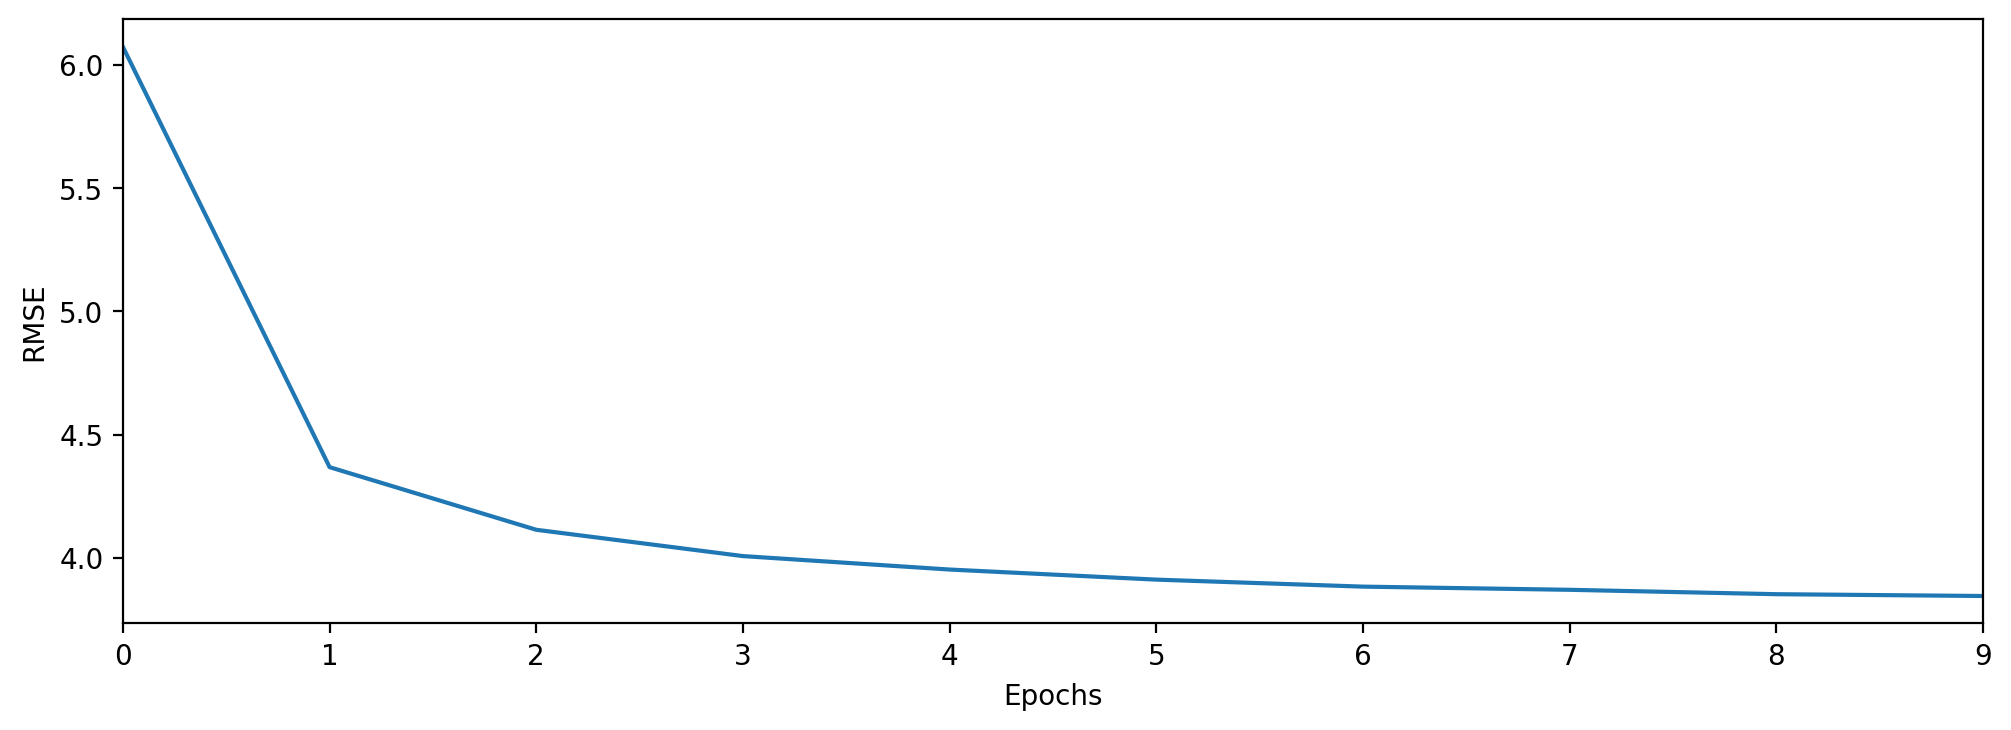

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4), dpi=200)
ax.plot(root_metrics_df["rmse"])

ax.set_xlabel("Epochs")
ax.set_ylabel("RMSE")

ax.set_xlim([0, epochs-1])
plt.show

In [128]:
X_test_scaled = st_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [129]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

RMSE: 3.7731507552797527
MAE: 1.1252009770683564


# Pipeline

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [139]:
def NNRegressor():
    model = keras.Sequential(
    [layers.Dense(36, activation="relu", input_shape=[X_train.shape[1]]),
     #layers.Dropout(0.2),
     layers.Dense(36, activation="relu"),
     #layers.Dropout(0.2),
     layers.Dense(1)])
    
    optimizer = keras.optimizers.RMSprop(0.001)
    
    model.compile(loss="mse",
                 optimizer=optimizer,
                 metrics=["mae"])
    return model

In [140]:
epochs = 30
#batch_size = 250

In [141]:
scaler = StandardScaler()
nn = KerasRegressor(NNRegressor, 
                    epochs = epochs, 
                    #batch_size=batch_size, 
                    validation_split=0.2)

In [142]:
pipe = Pipeline([
    ("Robust Scaler", scaler), # fit -> transform
    ("Neural Network", nn) # fit
])

In [143]:
pipe.fit(X_train, y_train.values)

Train on 99669 samples, validate on 24918 samples
Epoch 1/30
99669/99669 [==============================] - 23s 235us/sample - loss: 41.0653 - mae: 3.8261 - val_loss: 30.9088 - val_mae: 3.0552
Epoch 2/30
99669/99669 [==============================] - 20s 200us/sample - loss: 26.7964 - mae: 2.5158 - val_loss: 22.0687 - val_mae: 2.0303
Epoch 3/30
99669/99669 [==============================] - 20s 197us/sample - loss: 19.9596 - mae: 1.7555 - val_loss: 19.0966 - val_mae: 2.0054
Epoch 4/30
99669/99669 [==============================] - 20s 198us/sample - loss: 17.6040 - mae: 1.4639 - val_loss: 16.9751 - val_mae: 1.4256
Epoch 5/30
99669/99669 [==============================] - 20s 199us/sample - loss: 16.6526 - mae: 1.3554 - val_loss: 16.0627 - val_mae: 1.2100
Epoch 6/30
99669/99669 [==============================] - 20s 199us/sample - loss: 16.1601 - mae: 1.2990 - val_loss: 16.6542 - val_mae: 1.4734
Epoch 7/30
99669/99669 [==============================] - 20s 199us/sample - loss: 15.9233 -

Pipeline(memory=None,
         steps=[('Robust Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Neural Network',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000000ABDCAABE48>)],
         verbose=False)

In [144]:
y_pred = pipe.predict(X_test)

In [145]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

RMSE: 3.7821956057277055
MAE: 0.9570050068591036
